In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data exploration


In [43]:
df = pd.read_csv('.\datasets\diabetes.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Yass\AppData\Local\Temp\ipykernel_1060\2294821011.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('.\datasets\diabetes.csv')


In [44]:
df.sample(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
603,7,150,78,29,126,35.2,0.692,54,1
130,4,173,70,14,168,29.7,0.361,33,1
221,2,158,90,0,0,31.6,0.805,66,1
589,0,73,0,0,0,21.1,0.342,25,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: ylabel='count'>

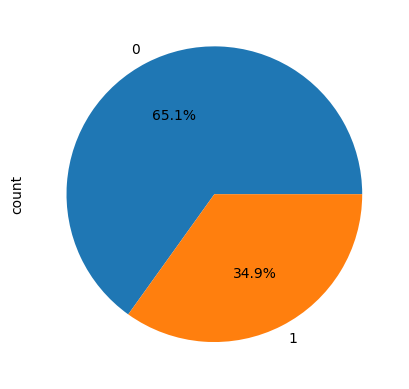

In [46]:
df.Outcome.value_counts().plot.pie(autopct="%1.1f%%")

In [47]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train_resample, y_train_resample = smt.fit_resample(df.drop(columns=["Outcome"]),df["Outcome"])

<Axes: ylabel='count'>

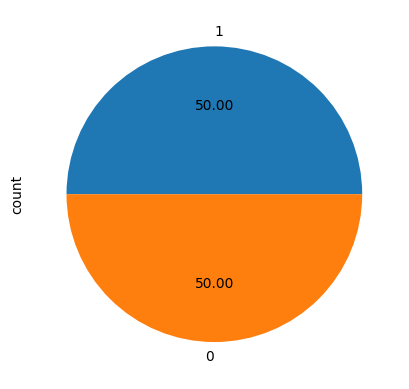

In [48]:
y_train_resample.value_counts().plot.pie(autopct="%.2f")

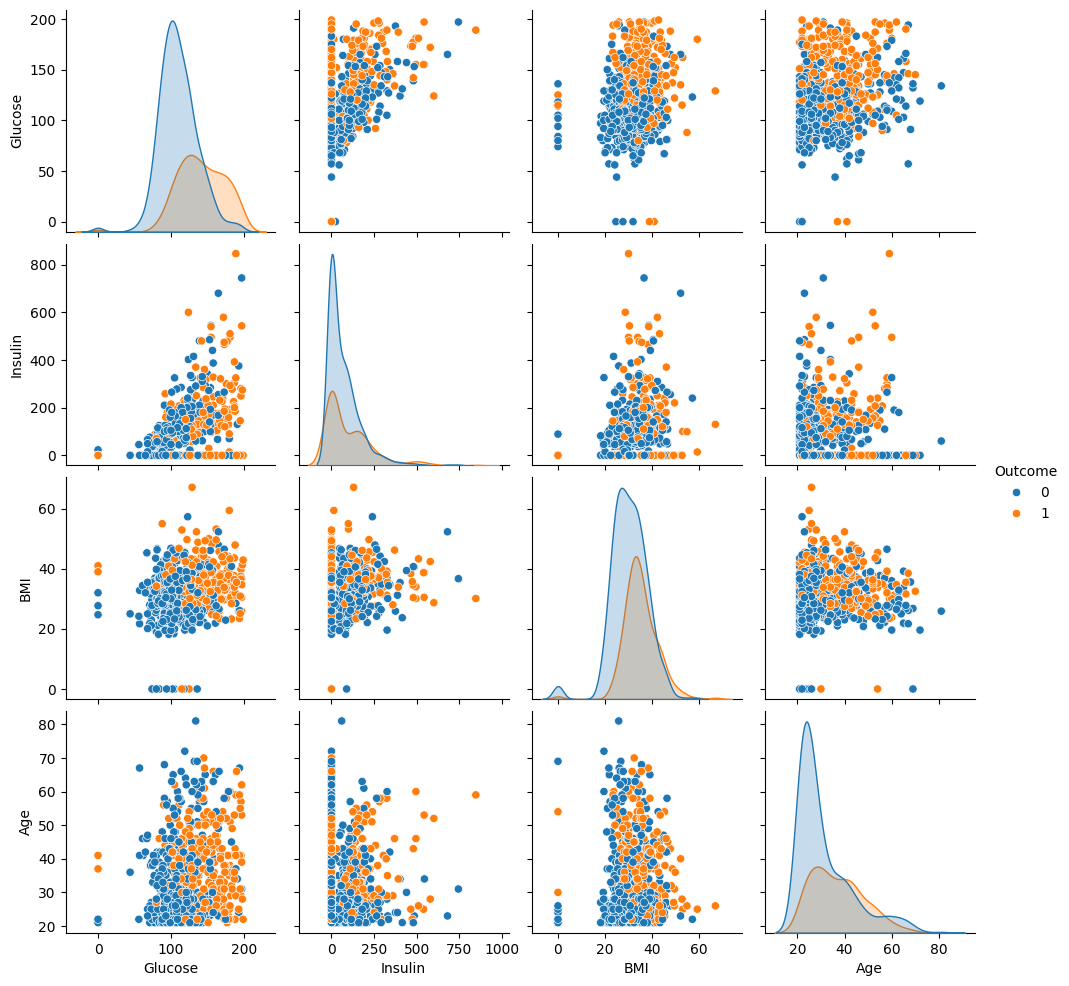

In [93]:
graph = ['Glucose','Insulin','BMI','Age','Outcome']
sns.pairplot(df[graph],hue="Outcome")

In [49]:
columns = X_train_resample.columns.to_list()

In [50]:
columns 

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [51]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()
scaler.fit(X_train_resample)
X_train_resample = pd.DataFrame(scaler.transform(X_train_resample),columns=columns)

In [103]:
import joblib

In [104]:
joblib.dump(scaler,"scaler.joblib")

['scaler.joblib']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X_train_resample,y_train_resample,test_size=0.2,stratify=y_train_resample,random_state=101)

In [59]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
866,0.288067,-0.761383,0.108547,0.692465,0.683524,0.486409,-0.021208,-0.535106
260,-0.309582,2.045502,-0.103563,-0.351884,0.383455,-0.221556,-0.584255,-0.015502
935,0.288067,1.109874,1.434232,-1.273369,-0.700128,0.355185,-1.021286,1.370110
487,-1.206055,1.484125,0.426711,0.692465,1.508715,1.841710,2.038146,2.062916
815,-1.206055,0.392559,-3.709426,-1.273369,-0.700128,0.574551,1.276582,-0.794908


In [85]:
from sklearn.svm import SVC
model = SVC(kernel="rbf")

In [86]:
model.fit(X_train,y_train)

SVC()

In [87]:
predictions = model.predict(X_test)

In [88]:
predictions

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1], dtype=int64)

In [89]:
from sklearn.metrics import classification_report


In [91]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       100
           1       0.78      0.80      0.79       100

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



In [95]:
from sklearn.neighbors import KNeighborsClassifier


In [96]:
knn = KNeighborsClassifier(n_neighbors=100)

In [97]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=100)

In [98]:
predictions = knn.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       100
           1       0.72      0.67      0.69       100

    accuracy                           0.70       200
   macro avg       0.71      0.71      0.70       200
weighted avg       0.71      0.70      0.70       200



In [99]:
from sklearn.linear_model import LogisticRegression
LRModel=LogisticRegression(solver='lbfgs', max_iter=7600)
LRModel.fit(X_train,y_train)

LogisticRegression(max_iter=7600)

In [100]:
predictions = LRModel.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73       100
           1       0.75      0.65      0.70       100

    accuracy                           0.71       200
   macro avg       0.72      0.72      0.71       200
weighted avg       0.72      0.71      0.71       200



In [101]:
import joblib

In [102]:
joblib.dump(model, 'diabetes.joblib')

['diabetes.joblib']